In [133]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [2]:
# Data Loading

beer = pd.read_csv("MLB Beer Prices.csv")
games = pd.read_csv("baseballdata.csv")

In [3]:
beer.head()

,Year,Team,Nickname,City,Price,Size,Price per Ounce
0,2013,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.285714
1,2013,Atlanta Braves,Braves,Atlanta,7.25,16.0,0.453125
2,2013,Baltimore Orioles,Orioles,Baltimore,6.75,18.0,0.375000
3,2013,Boston Red Sox,Red Sox,Boston,7.25,12.0,0.604167
4,2013,Chicago Cubs,Cubs,Chicago,7.25,16.0,0.453125


In [7]:
games.columns

Index(['Unnamed: 0', 'Rk', 'Year', 'Tm', 'Lg', 'G', 'W', 'L', 'Ties', 'W.L.',
       'pythW.L.', 'Finish', 'GB', 'Playoffs', 'R', 'RA', 'Attendance',
       'BatAge', 'PAge', 'X.Bat', 'X.P', 'Top.Player', 'Managers', 'current'],
      dtype='object')

In [50]:
# Data Cleaning and filtering

games = games[['Rk', 'Year', 'Tm', 'Lg', 'G', 'W', "L", 'Ties', 'W.L.', 'Attendance']]
games = games[games['Year']>=2013]
games.head()

,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,Attendance
0,1,2016,Arizona Diamondbacks,NL West,162,69,93,0,0.426,"2,036,216"
1,2,2015,Arizona Diamondbacks,NL West,162,79,83,0,0.488,"2,080,145"
2,3,2014,Arizona Diamondbacks,NL West,162,64,98,0,0.395,"2,073,730"
3,4,2013,Arizona Diamondbacks,NL West,162,81,81,0,0.500,"2,134,895"
19,1,2016,Atlanta Braves,NL East,161,68,93,0,0.422,"2,020,914"


In [52]:
games['Lg'].unique()

array(['NL West', 'NL East', 'AL East', 'NL Central', 'AL Central',
       'AL West'], dtype=object)

In [53]:
gamesMLB = games[(games['Lg'] == 'NL Central') | (games['Lg'] == 'NL East') | (games['Lg'] == 'NL West')
                 | (games['Lg'] == 'AL West') | (games['Lg'] == 'AL Central') | (games['Lg'] == 'AL East')]

In [63]:
gamesMLB['Tm'] = gamesMLB['Tm'].apply(lambda x: 'Los Angeles Angels' if x =='Los Angeles Angels of Anaheim' else x)

In [72]:
gamesMLB = gamesMLB .reset_index(drop = True)
gamesMLB

,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,Attendance
0,1,2016,Arizona Diamondbacks,NL West,162,69,93,0,0.426,"2,036,216"
1,2,2015,Arizona Diamondbacks,NL West,162,79,83,0,0.488,"2,080,145"
2,3,2014,Arizona Diamondbacks,NL West,162,64,98,0,0.395,"2,073,730"
3,4,2013,Arizona Diamondbacks,NL West,162,81,81,0,0.500,"2,134,895"
4,1,2016,Atlanta Braves,NL East,161,68,93,0,0.422,"2,020,914"
...,...,...,...,...,...,...,...,...,...,...
115,4,2013,Toronto Blue Jays,AL East,162,74,88,0,0.457,"2,536,562"
116,1,2016,Washington Nationals,NL East,162,95,67,0,0.586,"2,481,938"
117,2,2015,Washington Nationals,NL East,162,83,79,0,0.512,"2,619,843"
118,3,2014,Washington Nationals,NL East,162,96,66,0,0.593,"2,579,389"


In [136]:
df = beer.merge(gamesMLB, how = 'right', left_on=['Year','Team'], right_on = ['Year', 'Tm']).drop(columns = ['Ties', 'Tm', 'Lg'])
df['Attendance'] = df['Attendance'].apply(lambda x: int(re.sub('\W', "", x)))

In [137]:
df

,Year,Team,Nickname,City,Price,Size,Price per Ounce,Rk,G,W,L,W.L.,Attendance
0,2016,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.285714,1,162,69,93,0.426,2036216
1,2015,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.285714,2,162,79,83,0.488,2080145
2,2014,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.285714,3,162,64,98,0.395,2073730
3,2013,Arizona Diamondbacks,Diamondbacks,Arizona,4.00,14.0,0.285714,4,162,81,81,0.500,2134895
4,2016,Atlanta Braves,Braves,Atlanta,7.75,16.0,0.484375,1,161,68,93,0.422,2020914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2013,Toronto Blue Jays,Blue Jays,Toronto,7.34,14.0,0.524286,4,162,74,88,0.457,2536562
116,2016,Washington Nationals,Nationals,Washington,6.50,16.0,0.406250,1,162,95,67,0.586,2481938
117,2015,Washington Nationals,Nationals,Washington,6.50,16.0,0.406250,2,162,83,79,0.512,2619843
118,2014,Washington Nationals,Nationals,Washington,6.50,16.0,0.406250,3,162,96,66,0.593,2579389


In [138]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Price per Ounce']), df['Price per Ounce'], test_size=0.2)

In [139]:
X_train

,Year,Team,Nickname,City,Price,Size,Rk,G,W,L,W.L.,Attendance
68,2016,New York Mets,Mets,New York,5.75,12.0,1,162,87,75,0.537,2789602
51,2013,Los Angeles Angels,Angels,Anaheim,4.50,16.0,4,162,78,84,0.481,3019505
65,2015,Minnesota Twins,Twins,Minnesota,7.50,20.0,2,162,83,79,0.512,2220054
12,2016,Boston Red Sox,Red Sox,Boston,7.75,12.0,1,162,93,69,0.574,2955434
99,2013,Seattle Mariners,Mariners,Seattle,5.50,12.0,4,162,71,91,0.438,1761546
...,...,...,...,...,...,...,...,...,...,...,...,...
10,2014,Baltimore Orioles,Orioles,Baltimore,6.75,16.0,3,162,96,66,0.593,2464473
77,2015,Oakland Athletics,Athletics,Oakland,5.00,12.0,2,162,68,94,0.420,1768175
22,2014,Chicago White Sox,White Sox,Chicago,6.50,16.0,3,162,73,89,0.451,1650821
106,2014,Tampa Bay Rays,Rays,Tampa,5.00,12.0,3,162,77,85,0.475,1446464


<AxesSubplot:xlabel='Attendance', ylabel='Price per Ounce'>

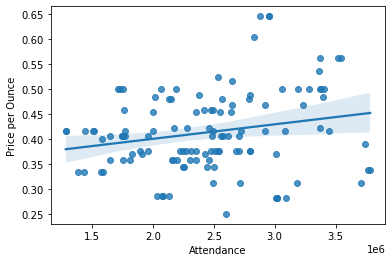

In [140]:
# Relationship between Attendance and Price per Ounce

sns.regplot(x='Attendance', y="Price per Ounce", data=df)

(array([2., 1., 2., 2., 3., 2., 1., 9., 2., 1., 3., 3., 4., 4., 5., 5., 2.,
        4., 5., 9., 6., 5., 4., 1., 5., 1., 4., 4., 2., 1., 2., 2., 0., 7.,
        1., 1., 1., 0., 1., 3.]),
 array([1286163.  , 1348567.35, 1410971.7 , 1473376.05, 1535780.4 ,
        1598184.75, 1660589.1 , 1722993.45, 1785397.8 , 1847802.15,
        1910206.5 , 1972610.85, 2035015.2 , 2097419.55, 2159823.9 ,
        2222228.25, 2284632.6 , 2347036.95, 2409441.3 , 2471845.65,
        2534250.  , 2596654.35, 2659058.7 , 2721463.05, 2783867.4 ,
        2846271.75, 2908676.1 , 2971080.45, 3033484.8 , 3095889.15,
        3158293.5 , 3220697.85, 3283102.2 , 3345506.55, 3407910.9 ,
        3470315.25, 3532719.6 , 3595123.95, 3657528.3 , 3719932.65,
        3782337.  ]),
 <BarContainer object of 40 artists>)

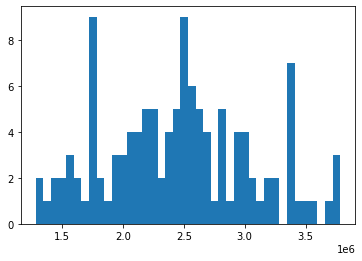

In [141]:
# Looking at the spread of attendance

plt.hist(df['Attendance'], bins = 40)

(array([ 1.,  0.,  0.,  1.,  5.,  3., 11.,  6., 12.,  9.,  8.,  6., 11.,
        10., 12.,  8.,  6.,  9.,  1.,  1.]),
 array([0.315  , 0.33125, 0.3475 , 0.36375, 0.38   , 0.39625, 0.4125 ,
        0.42875, 0.445  , 0.46125, 0.4775 , 0.49375, 0.51   , 0.52625,
        0.5425 , 0.55875, 0.575  , 0.59125, 0.6075 , 0.62375, 0.64   ]),
 <BarContainer object of 20 artists>)

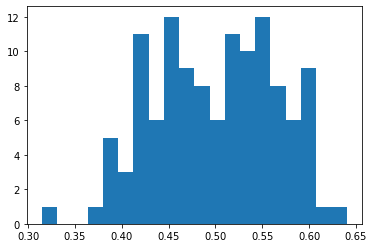

In [142]:
# Looking at the spread of W.L. Ratios

plt.hist(df['W.L.'], bins = 20)

In [155]:
# Model training and prediction

pl = Pipeline([('norm', Normalizer()), ('lr', LinearRegression())])
pl.fit(X_train[['W.L.', 'Attendance','Year', 'Rk']], y_train)

Pipeline(steps=[('norm', Normalizer()), ('lr', LinearRegression())])

In [156]:
pl.predict(X_test[['W.L.', 'Attendance', 'Year','Rk']])

array([0.42485871, 0.4107673 , 0.4204306 , 0.42945353, 0.43782009,
       0.43710884, 0.40749003, 0.40573316, 0.43552452, 0.4179206 ,
       0.41517064, 0.40807052, 0.41490957, 0.39350897, 0.43526913,
       0.41751564, 0.39507961, 0.39488058, 0.40209515, 0.40985704,
       0.42252416, 0.38770504, 0.39128767, 0.39165338])

In [158]:
pred = pl.predict(X_test[['W.L.', 'Attendance','Year','Rk']])

In [159]:
cal = pd.DataFrame()

In [161]:
cal['actual'] = y_test 
cal['pred'] = pred


In [163]:
np.mean((y_test-pred)**2)**(1/2)

0.08386878327766348